# **MEGASTORE SALES ANALYSIS**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load data**

In [49]:
df = pd.read_csv("/content/superstoredata.csv")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


``we have (396983, 9) this numer of rows and columns``

In [50]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   Sales        541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


`our Invoice date columns is in object so we need to convert it into datetime`

In [51]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales'],
      dtype='object')

 **checking for null values**

In [52]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Sales,0


In [78]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,Sales
count,541797.000000,541797,541797.000000,541797.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,17.991513
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-168469.600000
25%,1.000000,2011-03-28 11:36:00,1.250000,3.400000
50%,3.000000,2011-07-20 08:59:00,2.080000,9.750000
75%,10.000000,2011-10-19 11:41:00,4.130000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,218.103428,NaN,96.769831,378.849887


In [79]:
## How many duplicate items?
df.duplicated().sum()

np.int64(5268)

In [80]:
## How many unique StockCodes are there
df.StockCode.nunique()

3958

In [82]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country', 'Sales'],
      dtype='object')

In [83]:
df.loc[df['StockCode']== '85123A'][['StockCode','Description']]

,StockCode,Description
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER
49,85123A,WHITE HANGING HEART T-LIGHT HOLDER
66,85123A,WHITE HANGING HEART T-LIGHT HOLDER
220,85123A,WHITE HANGING HEART T-LIGHT HOLDER
262,85123A,WHITE HANGING HEART T-LIGHT HOLDER
...,...,...
539342,85123A,CREAM HANGING HEART T-LIGHT HOLDER
539979,85123A,WHITE HANGING HEART T-LIGHT HOLDER
540217,85123A,WHITE HANGING HEART T-LIGHT HOLDER
540837,85123A,CREAM HANGING HEART T-LIGHT HOLDER


**customer id columns have more higher number of null values so we can drop it**

In [53]:
df.drop('CustomerID',axis=1,inplace=True)

In [54]:
# Fill missing 'Description' values based on the first occurrence of each 'StockCode'
df['Description'] = df['Description'].fillna(df.groupby('StockCode')['Description'].transform('first'))


In [55]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,112
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0
Sales,0


In [56]:
# we have now only 112 rows which have null values in description column
#
df.dropna(subset=['Description','Quantity','InvoiceDate'],axis=0,inplace=True)
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0
Sales,0


**we will see the corelation between numerical columns**

In [57]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['number'])
numerical_df.corr()

,Quantity,UnitPrice,Sales
Quantity,1.000000,-0.001236,0.886682
UnitPrice,-0.001236,1.000000,-0.162029
Sales,0.886682,-0.162029,1.000000


**our next step is to see negative values**

`Filter out non-numeric columns`

In [58]:
# Selecting numerical columns
numerical_df = df.select_dtypes(include='number')

# Identifying columns with negative values
negative_columns = numerical_df.columns[(numerical_df < 0).any()]

# Display results
print("Numeric columns with negative values:")
print(negative_columns)

# Checking how many negative values exist in each of these columns
negative_counts = (numerical_df[negative_columns] < 0).sum()
print("\nCount of negative values per column:")
print(negative_counts)


Numeric columns with negative values:
Index(['Quantity', 'UnitPrice', 'Sales'], dtype='object')

Count of negative values per column:
Quantity     10527
UnitPrice        2
Sales         9290
dtype: int64


**Negative quantity and positive unit price showing returned items or cancelled item**

`while negative quantity and negative unt price showing refunded item`

In [59]:
negative_df = df[(df['Quantity']<0) | (df['UnitPrice']<0) | (df['Sales']<0)]
negative_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,United Kingdom,-1.25


In [60]:
refunded = df[(df['UnitPrice']<0 & (df['Quantity']<0))]
refunded

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,United Kingdom,-11062.06


In [61]:
returned_item = df[(df['UnitPrice']> 0) & (df['Quantity'] < 0)]
returned_item

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,United Kingdom,-1.25


**top 10 returned items**

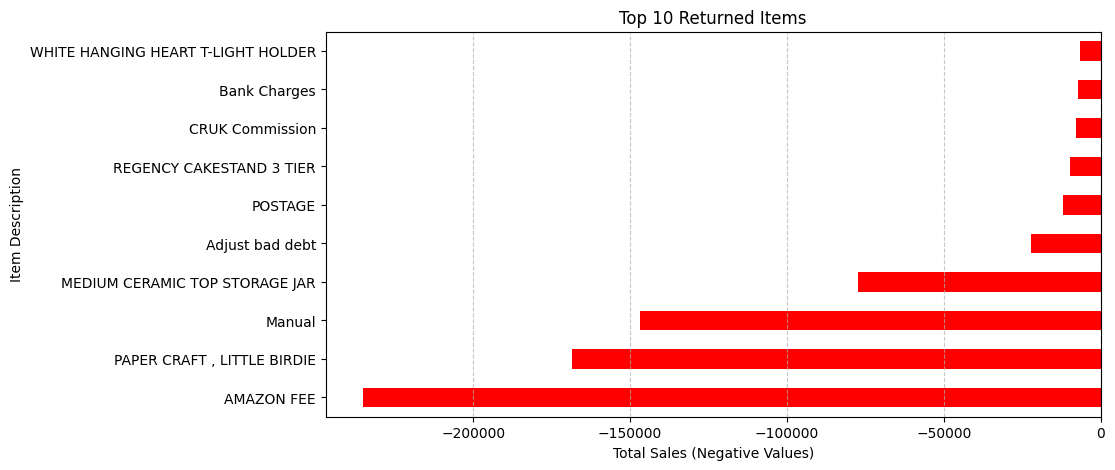

In [62]:
import matplotlib.pyplot as plt

# Filter returned items (negative Sales values indicate returns)
returned_items = df[df['Sales'] < 0]

# Get the top 10 most returned items based on total negative Sales
top_10_returned_items = returned_items.groupby('Description')['Sales'].sum().nsmallest(10)

# Plot the results
plt.figure(figsize=(10, 5))
top_10_returned_items.plot(kind='barh', color='red')  # Adding color for better visualization
plt.xlabel("Total Sales (Negative Values)")
plt.ylabel("Item Description")
plt.title("Top 10 Returned Items")
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Improve readability with grid lines
plt.show()


In [63]:
top_10_returned_item = returned_item.groupby('Description')['Sales'].sum().nsmallest(10)
print(top_10_returned_item)

Description
AMAZON FEE                           -235281.59
PAPER CRAFT , LITTLE BIRDIE          -168469.60
Manual                               -146784.46
MEDIUM CERAMIC TOP STORAGE JAR        -77479.64
POSTAGE                               -11871.24
REGENCY CAKESTAND 3 TIER               -9722.55
CRUK Commission                        -7933.43
Bank Charges                           -7340.64
WHITE HANGING HEART T-LIGHT HOLDER     -6624.30
FAIRY CAKE FLANNEL ASSORTED COLOUR     -6591.42
Name: Sales, dtype: float64


**countries which have high returned trends**

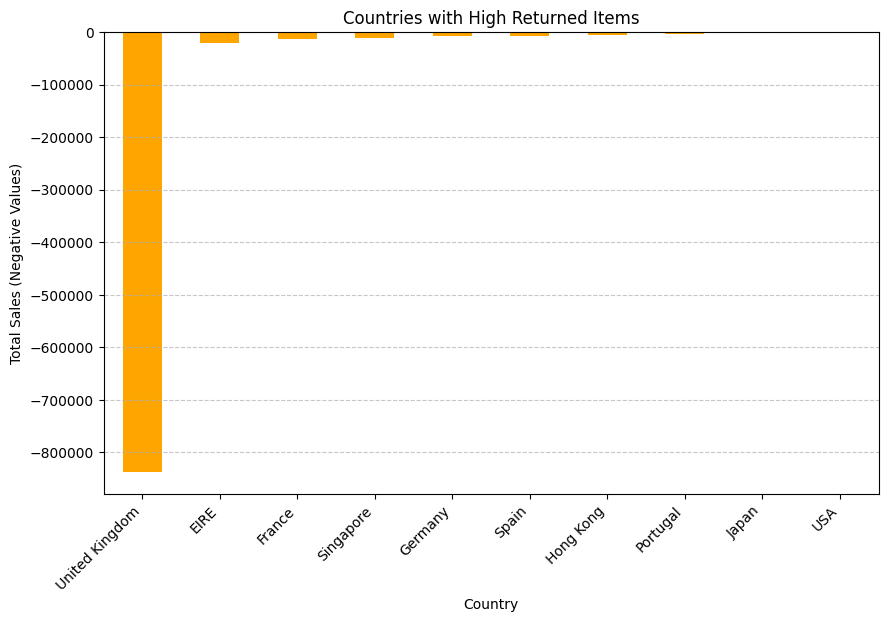

In [64]:
# Ensure 'returned_item' is correctly defined (assuming 'Sales' < 0 indicates returns)
returned_items=df[df['Sales'] < 0]

# Identify countries with the highest return values
countries_high_return_items=returned_items.groupby('Country')['Sales'].sum().nsmallest(10)

# Plot the results
plt.figure(figsize=(10, 6))  # Use plt.figure() instead of plt.Figure()
countries_high_return_items.plot(kind='bar', color='orange')  # Add color for clarity
plt.title('Countries with High Returned Items')
plt.xlabel("Country")
plt.ylabel("Total Sales (Negative Values)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for readability
plt.show()


In [65]:
countries_high_return_items= returned_item.groupby('Country')['Sales'].sum().nsmallest(10)
print(countries_high_return_items)

Country
United Kingdom   -815291.60
EIRE              -20177.14
France            -12311.21
Singapore         -12158.90
Germany            -7168.93
Spain              -6802.53
Hong Kong          -5574.76
Portugal           -4380.08
Japan              -2075.75
USA                -1849.47
Name: Sales, dtype: float64


**we will make our analysis on positive values**

In [66]:
# Filter out only positive transactions (valid sales)
positive_df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0) & (df['Sales'] > 0)]

# Display basic details of the filtered dataset
print(f"Original dataset size: {df.shape[0]} rows")
print(f"Filtered dataset size (only positive transactions): {positive_df.shape[0]} rows")

# Display
positive_df


Original dataset size: 541797 rows
Filtered dataset size (only positive transactions): 530104 rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France,16.60


**Regonal sale**

Country
United Kingdom          9025222.084
Netherlands              285446.340
EIRE                     283453.960
Germany                  228867.140
France                   209715.110
Australia                138521.310
Spain                     61577.110
Switzerland               57089.900
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33747.100
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15691.800
Cyprus                    13590.380
Austria                   10198.680
Israel                     8135.260
Poland                     7334.650
Greece                     4760.520
Unspecified                4749.790
Iceland                    4310.000
Canada                     3666.380
USA                 

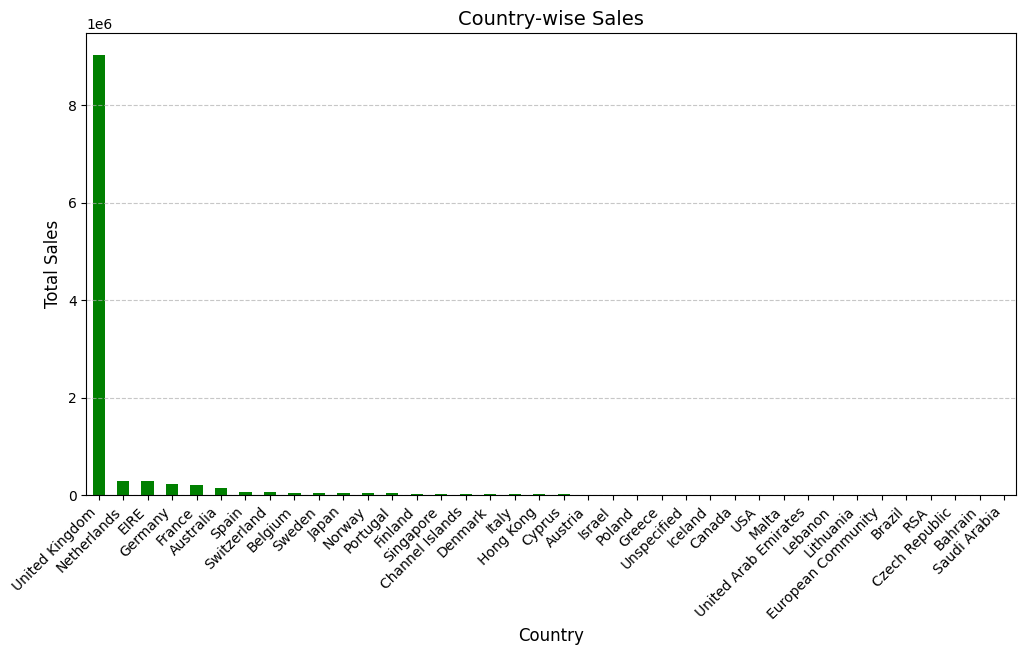

In [67]:
# Aggregate total sales per country and sort in descending order
Region_wise_sales = positive_df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

# Print the results
print(Region_wise_sales)

# Plot the sales distribution by country
plt.figure(figsize=(12, 6))  # Adjusted figure size for better visibility
Region_wise_sales.plot(kind='bar', color='green')  # Added color for better visualization
plt.title('Country-wise Sales', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for readability

# Display the plot
plt.show()  # Fixed the missing closing parenthesis


**Pie chart**

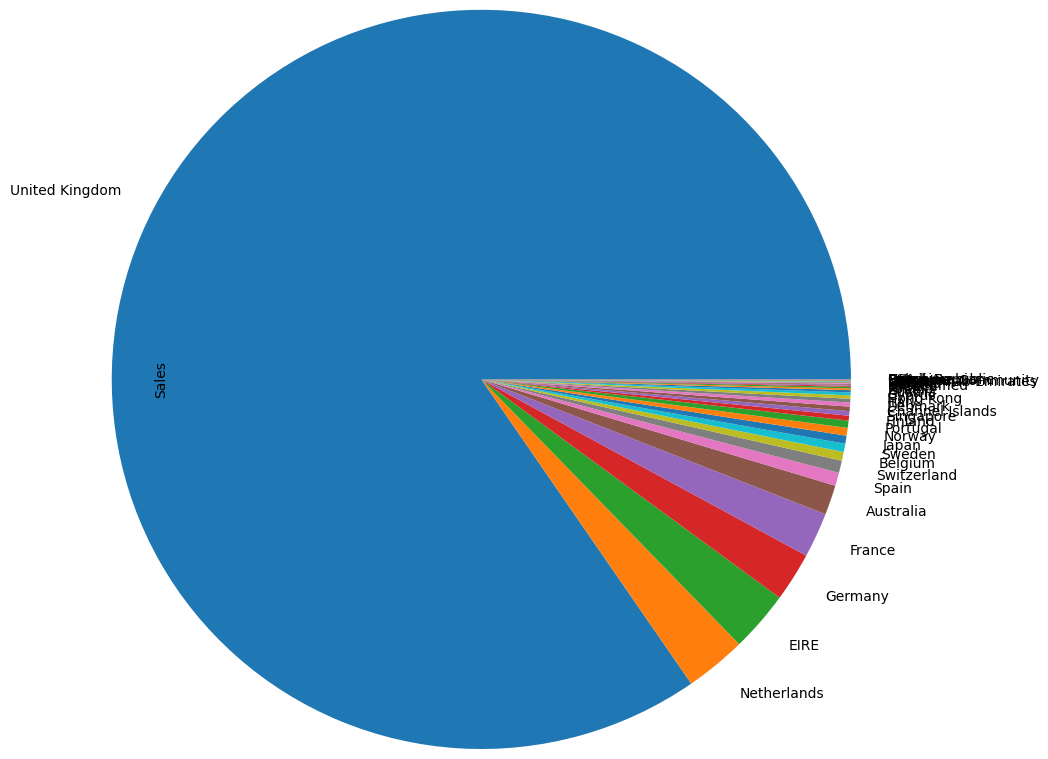

In [68]:
plt.figure(figsize=(10,8))
Region_wise_sales.plot(kind='pie',radius=1.5)
plt.show()

**seasonal wise analysis of sale**

In [69]:
# Extract year and month from the 'InvoiceDate' column
positive_df['Year'] = positive_df['InvoiceDate'].dt.year
positive_df['Month'] = positive_df['InvoiceDate'].dt.month

<ipython-input-69-d101a488890f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Year'] = positive_df['InvoiceDate'].dt.year
<ipython-input-69-d101a488890f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_df['Month'] = positive_df['InvoiceDate'].dt.month


In [70]:
Yearly_sale = positive_df.groupby('Year')['Sales'].sum()
Monthly_sales = positive_df.groupby('Month')['Sales'].sum()
print(Yearly_sale)
print(Monthly_sales)

Year
2010     823746.140
2011    9842938.404
Name: Sales, dtype: float64
Month
1      691364.560
2      523631.890
3      717639.360
4      537808.621
5      770536.020
6      761739.900
7      719221.191
8      759138.380
9     1058590.172
10    1154979.300
11    1509496.330
12    1462538.820
Name: Sales, dtype: float64


`Plotting monthly sales`

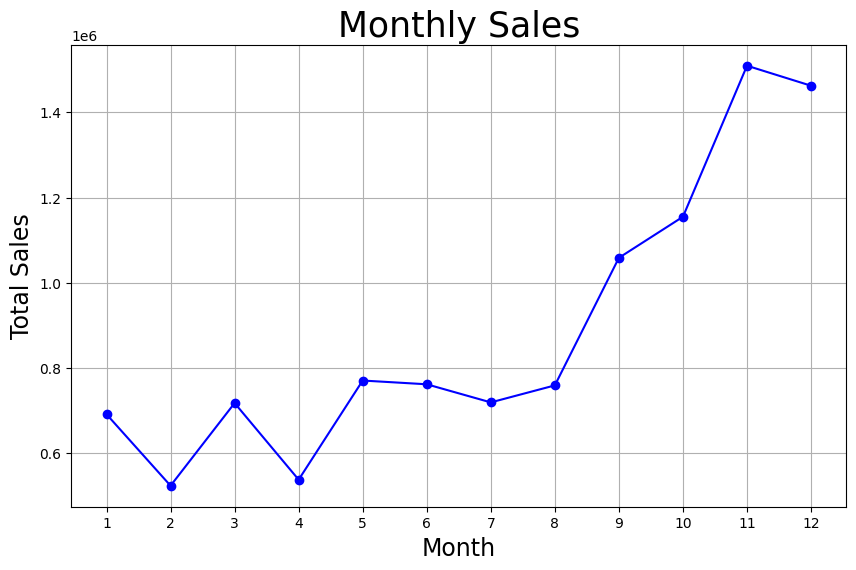

In [71]:
plt.figure(figsize=(10, 6))
Monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales',fontsize=25)
plt.xlabel('Month',fontsize=17)
plt.ylabel('Total Sales',fontsize=17)
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

`Plotting yearly sales`

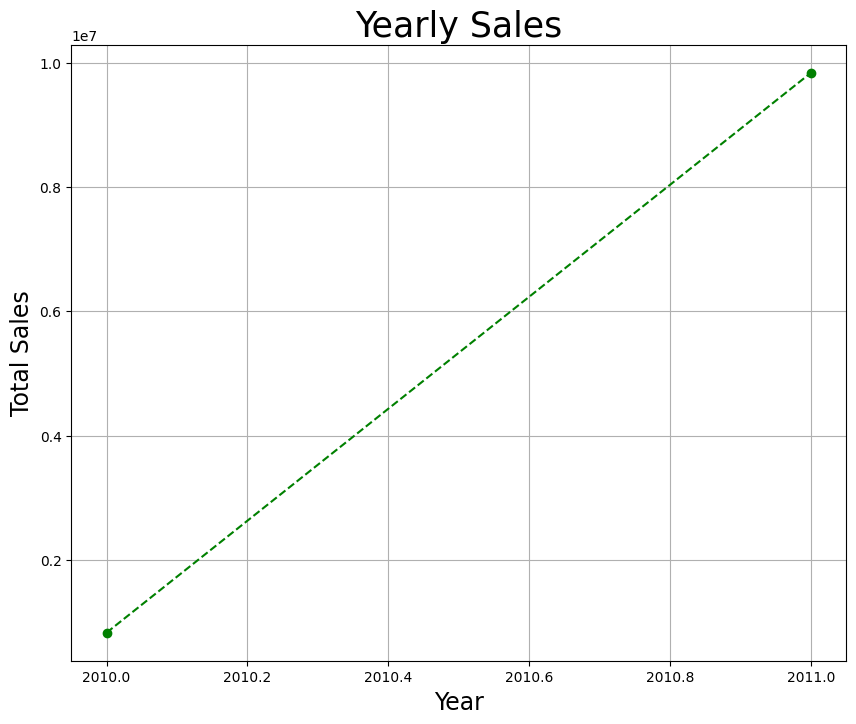

In [72]:
plt.figure(figsize=(10, 8))
Yearly_sale.plot(kind='line', marker='o', color='g',linestyle='dashed')
plt.title('Yearly Sales', fontsize=25)
plt.xlabel('Year',fontsize=17)
plt.ylabel('Total Sales',fontsize=17)
plt.grid(True)

plt.show()

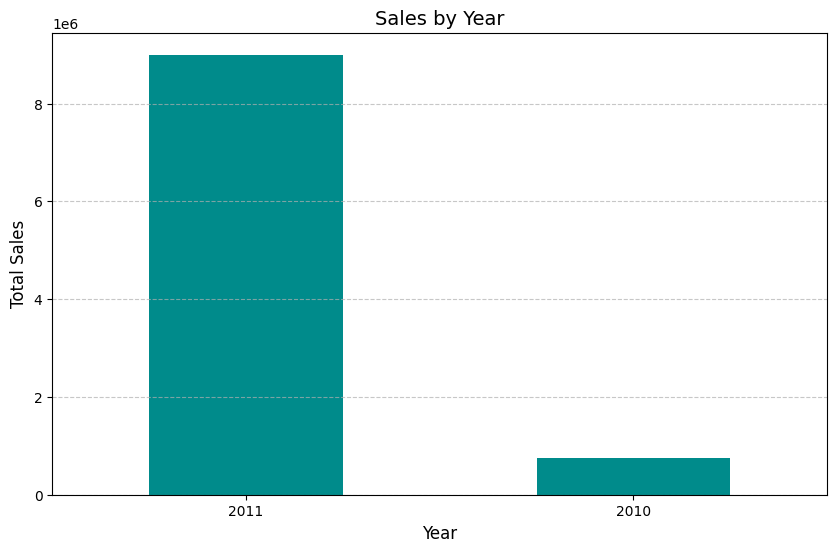

In [88]:
# Aggregate total sales by year
yearly_sales = df.groupby('Year')['Sales'].sum().sort_values(ascending=False)

# Plot sales by year
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='darkcyan')  # Improved color for visibility
plt.title("Sales by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=0)  # Keeps year labels readable
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Improves readability with grid lines

# Show the plot
plt.show()


**scatter plot of quantity and unit price**

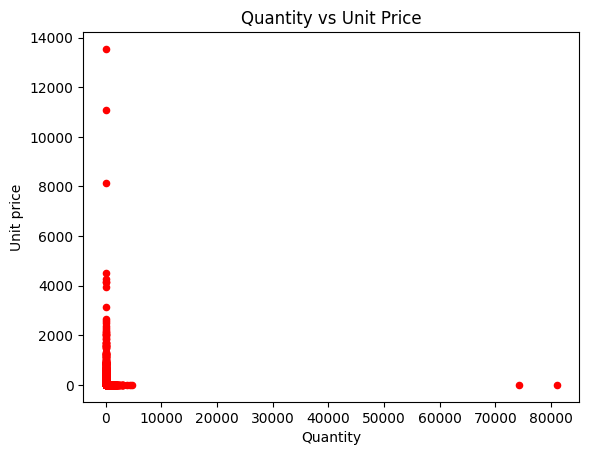

In [73]:
positive_df.plot.scatter(x='Quantity',y='UnitPrice',c='r')
plt.title('Quantity vs Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit price')
plt.show()

**Scatter plot of Invoice date vs Sales**

<Figure size 1000x800 with 0 Axes>

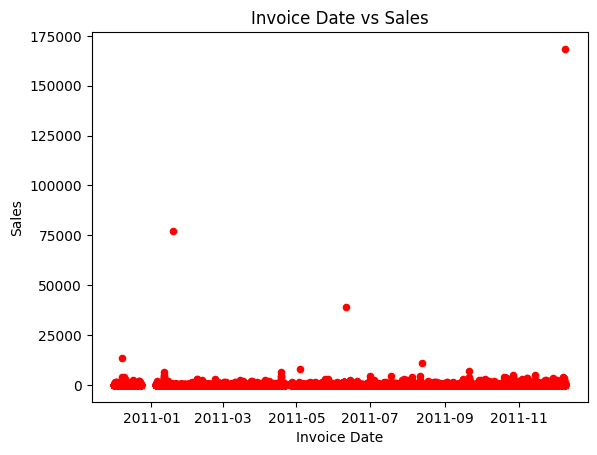

In [74]:
plt.figure(figsize=(10,8))
positive_df.plot.scatter(x='InvoiceDate' , y='Sales',c='r')
plt.title('Invoice Date vs Sales')
plt.xlabel('Invoice Date')
plt.ylabel('Sales')
plt.show()

**top 10 selling product and top 10 least selling product**

Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174484.74
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106292.77
PARTY BUNTING                          99504.33
JUMBO BAG RED RETROSPOT                94340.05
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
Manual                                 78112.82
POSTAGE                                78101.88
RABBIT NIGHT LIGHT                     66964.99
Name: Sales, dtype: float64


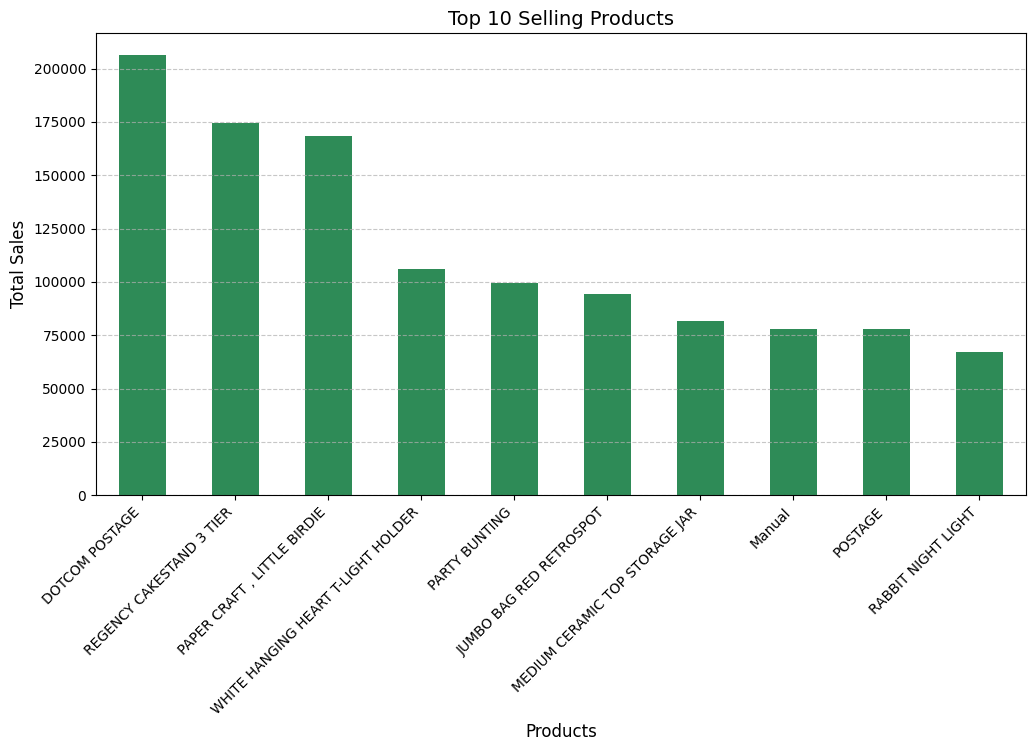

In [75]:
# Identify the top 10 selling products based on total sales
top_10_selling_products = positive_df.groupby('Description')['Sales'].sum().nlargest(10)

# Print the results
print(top_10_selling_products)

# Plot the top 10 selling products
plt.figure(figsize=(12, 6))  # Adjusted figure size for better visualization
top_10_selling_products.plot(kind='bar', color='seagreen')  # Added color for aesthetics
plt.title('Top 10 Selling Products', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for clarity

# Show the plot
plt.show()


**top 10 least selling products**

Description
PADS TO MATCH ALL CUSHIONS             0.003
HEN HOUSE W CHICK IN NEST              0.420
SET 12 COLOURING PENCILS DOILEY        0.650
VINTAGE BLUE TINSEL REEL               0.840
PINK CRYSTAL GUITAR PHONE CHARM        0.850
CAT WITH SUNGLASSES BLANK CARD         0.950
HAPPY BIRTHDAY CARD TEDDY/CAKE         0.950
60 GOLD AND SILVER FAIRY CAKE CASES    1.100
BLACKCHRISTMAS TREE 30CM               1.250
DUSTY PINK CHRISTMAS TREE 30CM         1.250
Name: Sales, dtype: float64


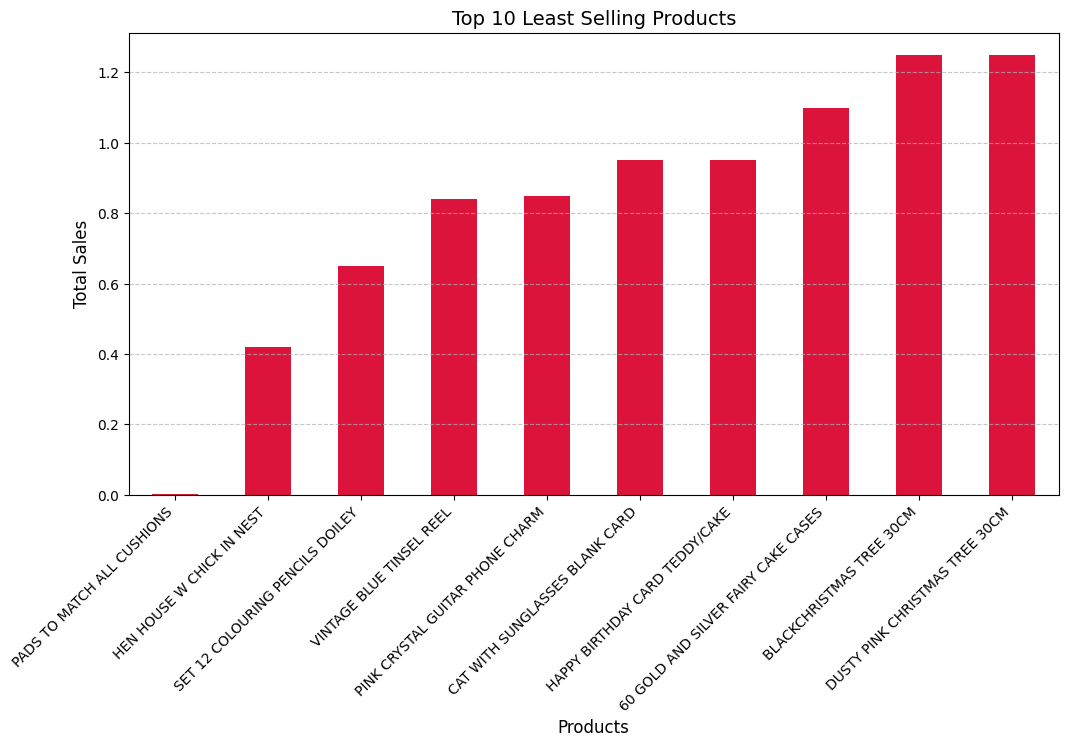

In [76]:
# Identify the top 10 least selling products based on total sales
top_10_least_selling_products = positive_df.groupby('Description')['Sales'].sum().nsmallest(10)

# Print the results
print(top_10_least_selling_products)

# Plot the least selling products
plt.figure(figsize=(12, 6))  # Adjusted figure size for better readability
top_10_least_selling_products.plot(kind='bar', color='crimson')  # Added color for clarity
plt.title('Top 10 Least Selling Products', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Improve readability with grid lines

# Show the plot
plt.show()


**top 10 selling produscts in france**

Description
POSTAGE                                15454.00
Manual                                  9492.37
RABBIT NIGHT LIGHT                      7277.20
REGENCY CAKESTAND 3 TIER                2816.85
RED TOADSTOOL LED NIGHT LIGHT           2169.75
PLASTERS IN TIN CIRCUS PARADE           1868.40
PLASTERS IN TIN WOODLAND ANIMALS        1868.40
ASSORTED COLOUR BIRD ORNAMENT           1842.76
ROUND SNACK BOXES SET OF4 WOODLAND      1837.80
RED RETROSPOT MINI CASES                1662.90
Name: Sales, dtype: float64


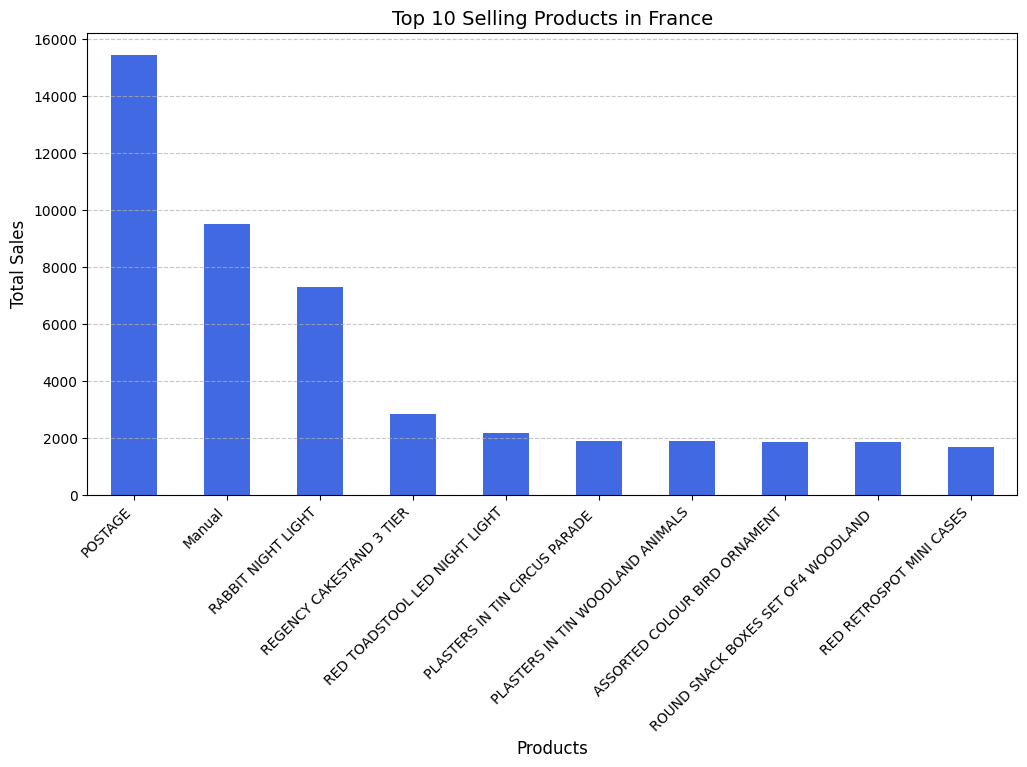

In [77]:
# Filter sales data for France and identify top 10 selling products
top_10_selling_products_france = (
    positive_df[positive_df['Country'] == 'France']
    .groupby('Description')['Sales']
    .sum()
    .nlargest(10)
)

# Print the results
print(top_10_selling_products_france)

# Plot the results
plt.figure(figsize=(12, 6))  # Set figure size for better readability
top_10_selling_products_france.plot(kind='bar', color='royalblue')  # Add color for clarity
plt.title('Top 10 Selling Products in France', fontsize=14)
plt.xlabel('Products', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Show the plot
plt.show()


**Months with Highest Sale**

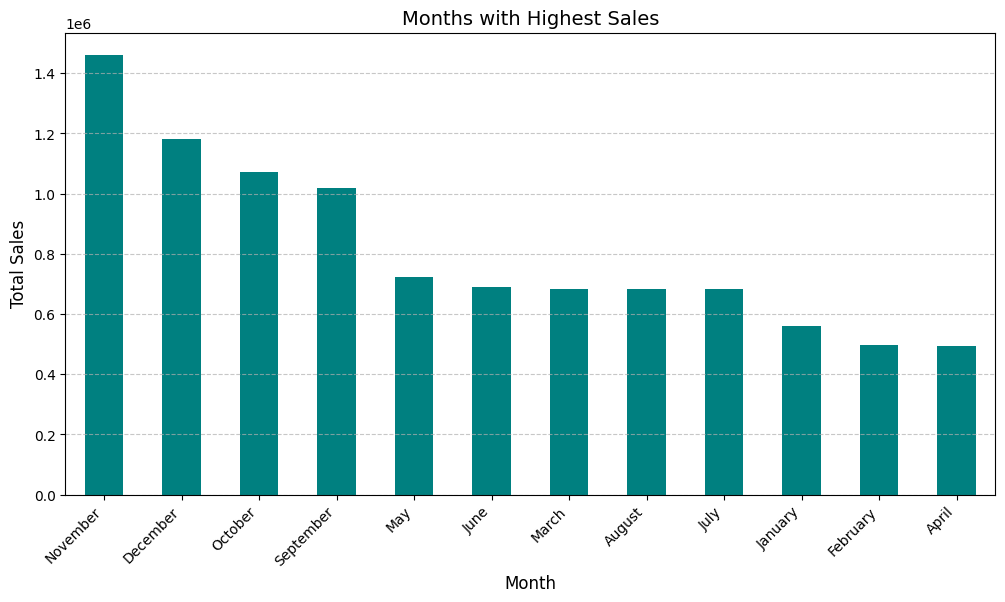

In [87]:
# Aggregate total sales by month
# Extract month name from InvoiceDate column
df['Month_name'] = df['InvoiceDate'].dt.month_name()
monthly_sales = df.groupby('Month_name')['Sales'].sum().sort_values(ascending=False)

# Plot the sales per month
plt.figure(figsize=(12, 6))  # Adjusted size for better readability
monthly_sales.plot(kind='bar', color='teal')  # Added color for better visualization
plt.title("Months with Highest Sales", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for clarity

# Show the plot
plt.show()

**Customer Segmentation**

In [91]:
def calculte_rfm(df, today_date):
    rfm = df.groupby('CustomerID').agg(
    {
        'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
        'InvoiceNo': lambda InvoiceNo: InvoiceNo.nunique(),
        'Sales': lambda Sales: Sales.sum()
    })

    rfm.columns = ['recency', 'frequency', 'monetary']
    return rfm

In [95]:
# Import necessary modules
import pandas as pd
import datetime as dt

# ... (Your previous code) ...

# Before calling calculte_rfm function
# --- If 'CustomerID' column was dropped before, you need to create it again or load original data ---
# Assuming you want to assign a unique customer ID for each invoice:
df['CustomerID'] = df.groupby('InvoiceNo').ngroup()  # Assign unique ID to each invoice group



today_date = dt.datetime(2011, 12, 11)
rfm_data = calculte_rfm(df, today_date)  # Now this should work without error

In [96]:
rfm_data.head()

,recency,frequency,monetary
CustomerID,,,
0,374,1,139.12
1,374,1,22.20
2,374,1,278.73
3,374,1,70.05
4,374,1,17.85


In [97]:
def score_customers(rfm):
    rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5,4,3,2,1])
    rfm['freqency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
    rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1,2,3,4,5])

    return rfm

In [98]:
scored_rfm = score_customers(rfm_data)
scored_rfm.head()

,recency,frequency,monetary,recency_score,freqency_score,monetary_score
CustomerID,,,,,,
0,374,1,139.12,1,1,2
1,374,1,22.20,1,1,2
2,374,1,278.73,1,1,3
3,374,1,70.05,1,1,2
4,374,1,17.85,1,1,2


In [99]:
def map_segments(rfm):
    seg_map = {
        r'[1-2][1-2]': 'Infrequent Shopper',
        r'[1-2][3-4]': 'Occasional Shopper',
        r'[1-2]5': 'Inactive High Spender',
        r'3[1-2]': 'Inactive Moderate Spender',
        r'33': 'Regular Customers',
        r'[3-4][4-5]': 'Loyal High Spenders',
        r'41': 'Early-stage Customer',
        r'51': 'New Customers',
        r'[4-5][2-3]': 'Potential High Spender',
        r'5[4-5]': 'Frequent High Spender'
    }

    rfm["segment"] = ''
    for pattern, segment in seg_map.items():
        # Use string conversion for matching
        matches = rfm[['recency_score', 'freqency_score']].astype(str).apply(''.join, axis=1).str.contains(pattern)
        rfm.loc[matches, 'segment'] = segment

    return rfm

In [100]:
segmented_customers = map_segments(scored_rfm)
segmented_customers.head(10)

,recency,frequency,monetary,recency_score,freqency_score,monetary_score,segment
CustomerID,,,,,,,
0,374,1,139.12,1,1,2,Infrequent Shopper
1,374,1,22.20,1,1,2,Infrequent Shopper
2,374,1,278.73,1,1,3,Infrequent Shopper
3,374,1,70.05,1,1,2,Infrequent Shopper
4,374,1,17.85,1,1,2,Infrequent Shopper
5,374,1,855.86,1,1,5,Infrequent Shopper
6,374,1,204.00,1,1,3,Infrequent Shopper
7,374,1,22.20,1,1,2,Infrequent Shopper
8,374,1,259.86,1,1,3,Infrequent Shopper


In [101]:
segmented_customers.segment.value_counts()

,count
segment,
Infrequent Shopper,8638
Frequent High Spender,5280
Loyal High Spenders,3431
Regular Customers,2700
Potential High Spender,2458
Inactive Moderate Spender,1677
Inactive High Spender,1604


Text(0.5, 1.0, 'Segmentation Count')

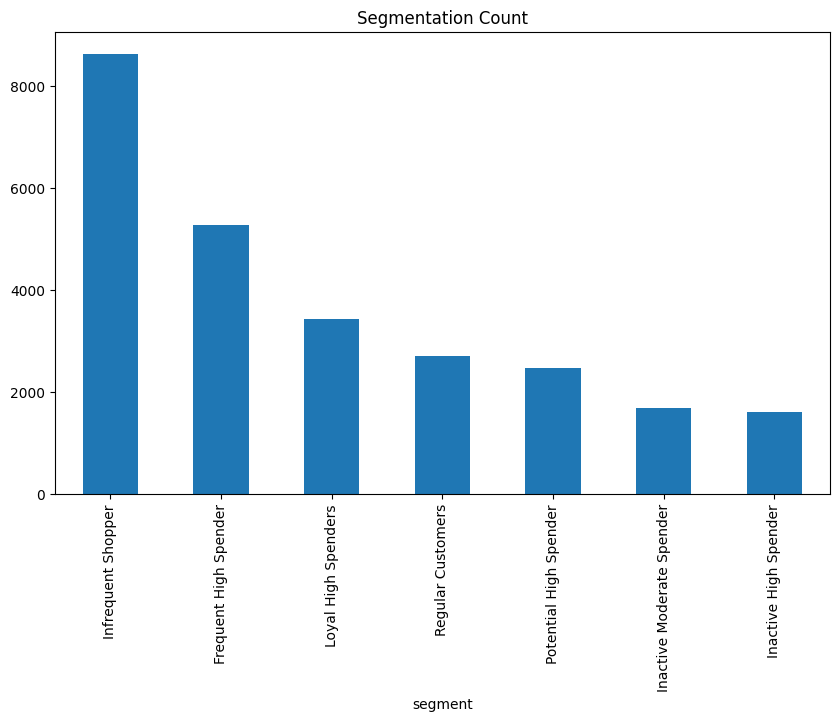

In [103]:
plt.figure(figsize=(10,6))
segmented_customers.segment.value_counts().plot(kind='bar')
plt.title("Segmentation Count")

Text(0.5, 1.0, 'Segment vs Spending')

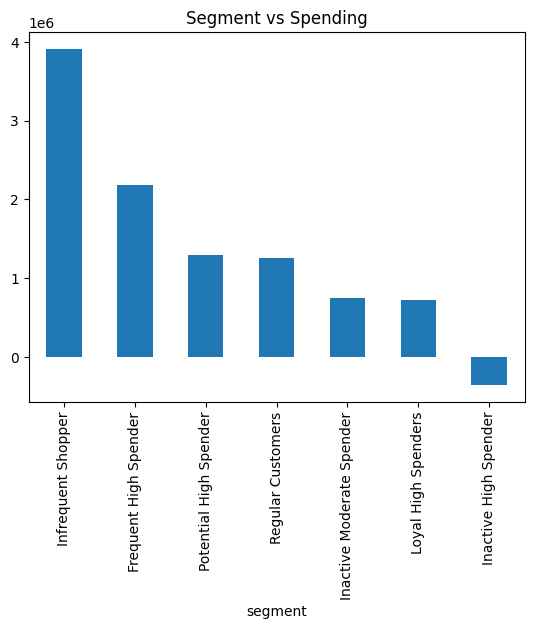

In [104]:
segmented_customers.groupby("segment")['monetary'].sum().nlargest(10).plot(kind='bar')
plt.title("Segment vs Spending")

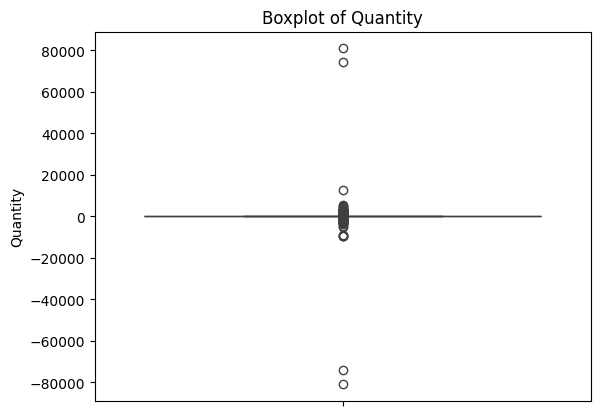

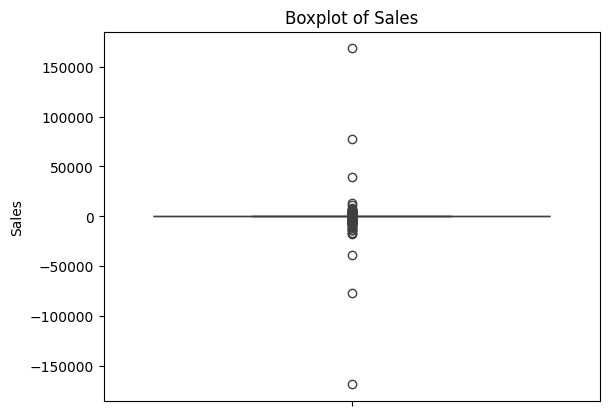

In [106]:
col = ["Quantity", "Sales"]
for c in col:
    # Use 'df' or 'positive_df' instead of 'clean_df'
    sns.boxplot(y=df[c])  # Or sns.boxplot(y=positive_df[c]) depending on which data you want to visualize
    plt.title(f'Boxplot of {c}')
    plt.show()

In [109]:
# Resample sales data to daily frequency
df = df.set_index('InvoiceDate')  # Set 'InvoiceDate' as the index
daily_sales = df.Sales.resample('D').sum()

# Print the daily sales
print(daily_sales)

InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-04        0.00
2010-12-05    31383.95
                ...   
2011-12-05    57751.32
2011-12-06    54228.37
2011-12-07    75076.22
2011-12-08    81417.78
2011-12-09    32131.53
Freq: D, Name: Sales, Length: 374, dtype: float64


In [110]:
daily=df.Sales.resample('D').sum()

InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-04        0.00
2010-12-05    31383.95
                ...   
2011-12-05    57751.32
2011-12-06    54228.37
2011-12-07    75076.22
2011-12-08    81417.78
2011-12-09    32131.53
Freq: D, Name: Sales, Length: 374, dtype: float64


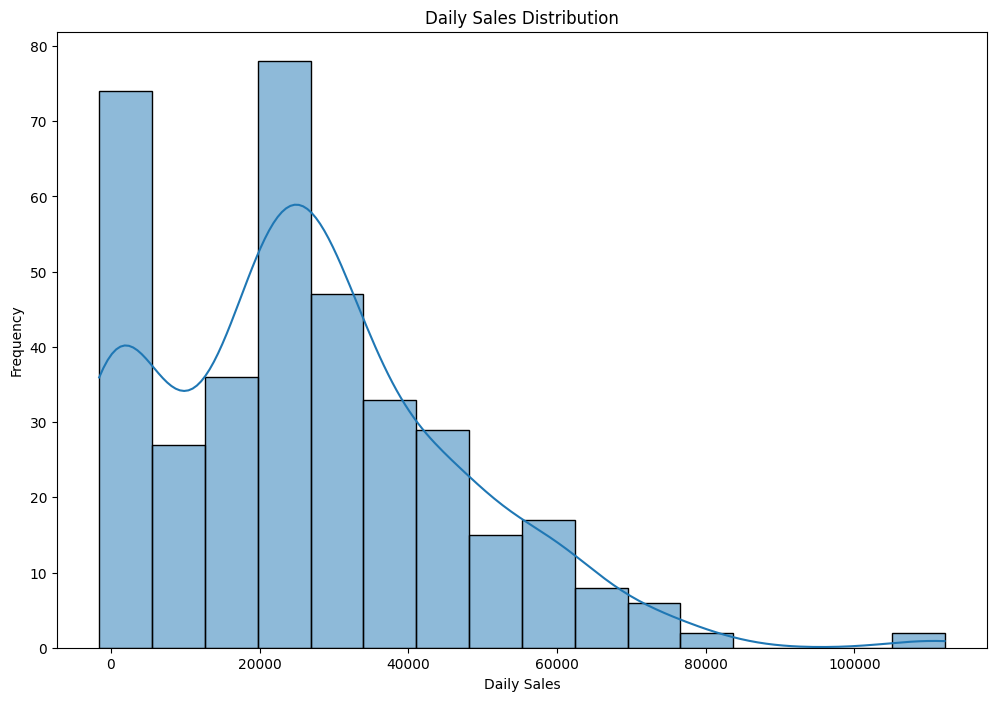

In [111]:
# Print the daily sales
print(daily_sales)

# Assign daily_sales to daily
daily = daily_sales

# Create a histogram
plt.figure(figsize=(12,8))
sns.histplot(daily,kde=True)  # Now 'daily' is defined and accessible
plt.title('Daily Sales Distribution')
plt.xlabel('Daily Sales')
plt.ylabel('Frequency')
plt.show()

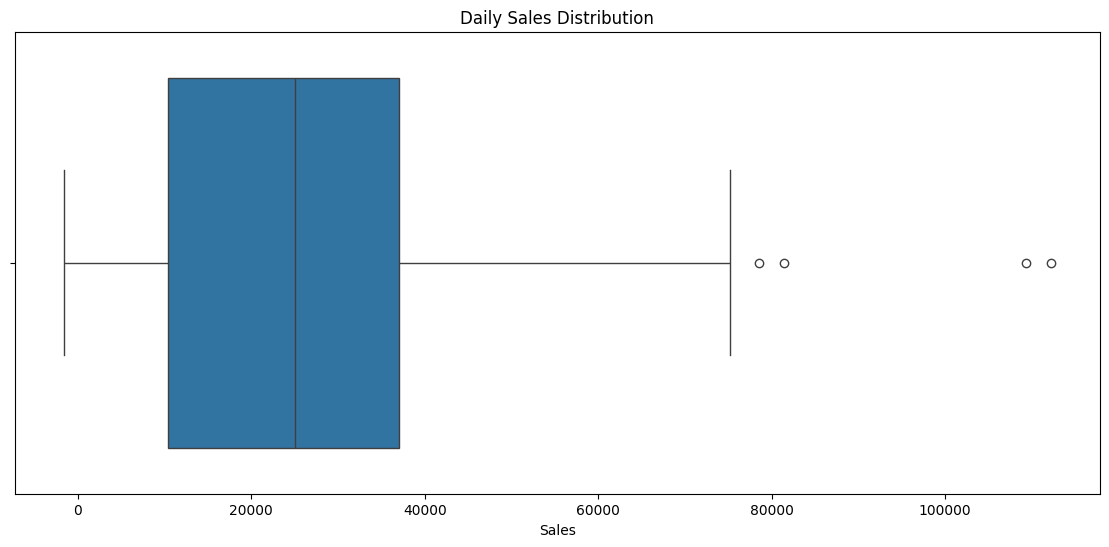

In [112]:
# Create a boxplot
plt.figure(figsize=(14,6))
sns.boxplot(x=daily)
plt.title('Daily Sales Distribution')
plt.show()